In [2]:
# Homework 4 Assignment 2 for PUI
# Using CitiBike data from February 2015 
# Data located in PUIDATA

In [59]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [60]:
def evalChisq(values):
    values = np.array(values)
    E = np.empty_like(values)
    for j in range(len(values[0])):
        for i in range(2):
            
            E[i][j] = ((values[i,:].sum() * values[:,j].sum()) / 
                        (values).sum())
    return ((values - E)**2 / E).sum()

**IDEA**

People born in the 90s (1990-1999) use Citibike at a higher rate than those born in the 80s (1980-1989). I think this is the case because they are a bit younger and are more inclined to get around by bike!

**Null and alternative hypothesis**

 H_null: CitiBike users born in the 1980s are just as likely or more likely to use the service than those born 
 in the 1990s. 

 H_alt : CitiBike users born in the 1990s are more likely to use the service than those born in the 1980s.

 Formula for Hnull : Proportion_1980 >= Proportion_1990

 Formula for Halt : Proportion_1980 < Proportion_1990

Confidence level is .05

In [5]:
datestring = '201502'
getCitiBikeCSV(datestring)

file in place, you can continue


In [6]:
feb = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
feb['date']=pd.to_datetime(feb['starttime'])
feb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [7]:
feb.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [8]:
# dropping everything but birth year and date
feb.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)
feb.head()

,birth year,date
0,1978.0,2015-02-01 00:00:00
1,1993.0,2015-02-01 00:00:00
2,1969.0,2015-02-01 00:01:00
3,1985.0,2015-02-01 00:01:00
4,1957.0,2015-02-01 00:01:00


In [9]:
feb.tail()

,birth year,date
196925,1990.0,2015-02-28 23:57:00
196926,1971.0,2015-02-28 23:58:00
196927,1985.0,2015-02-28 23:59:00
196928,1992.0,2015-02-28 23:59:00
196929,1995.0,2015-02-28 23:59:00


In [10]:
feb.columns = ['birth_year', 'date'] #renaming birth year to birth_year
feb.head()

,birth_year,date
0,1978.0,2015-02-01 00:00:00
1,1993.0,2015-02-01 00:00:00
2,1969.0,2015-02-01 00:01:00
3,1985.0,2015-02-01 00:01:00
4,1957.0,2015-02-01 00:01:00


In [12]:
# creating df for just the 80s
df_80s = feb[feb.birth_year >= 1980] #creates df for birthdays after 1980 
df_80s = df_80s[df_80s.birth_year < 1990]
df_80s.head()

,birth_year,date
3,1985.0,2015-02-01 00:01:00
6,1983.0,2015-02-01 00:04:00
8,1985.0,2015-02-01 00:04:00
9,1982.0,2015-02-01 00:05:00
10,1988.0,2015-02-01 00:05:00


In [13]:
# making sure df was refined properly
print(df_80s.birth_year.min())
print(df_80s.birth_year.max())

1980.0
1989.0


In [14]:
# creating df for just the 90s
df_90s = feb[feb.birth_year >= 1990] #creates df for birthdays after 1980 
df_90s = df_90s[df_90s.birth_year < 2000]
df_90s.head()

,birth_year,date
1,1993.0,2015-02-01 00:00:00
11,1991.0,2015-02-01 00:05:00
13,1990.0,2015-02-01 00:07:00
16,1990.0,2015-02-01 00:13:00
25,1993.0,2015-02-01 00:17:00


In [15]:
# making sure df was refined properly
print(df_90s.birth_year.min())
print(df_90s.birth_year.max())

1990.0
1999.0


In [16]:
# combining dataframes into one
dfs=[df_80s,df_90s]
all=pd.concat(dfs)
all.head()

,birth_year,date
3,1985.0,2015-02-01 00:01:00
6,1983.0,2015-02-01 00:04:00
8,1985.0,2015-02-01 00:04:00
9,1982.0,2015-02-01 00:05:00
10,1988.0,2015-02-01 00:05:00


In [17]:
all.tail()

,birth_year,date
196907,1995.0,2015-02-28 23:49:00
196924,1990.0,2015-02-28 23:57:00
196925,1990.0,2015-02-28 23:57:00
196928,1992.0,2015-02-28 23:59:00
196929,1995.0,2015-02-28 23:59:00


In [18]:
all.shape

(83831, 2)

In [21]:
# grouping by birth year and then counting, then resetting index

new = all.groupby(by='birth_year').count()
#new.head()
new = new.reset_index()
new.head()

,birth_year,date
0,1980.0,6274
1,1981.0,6144
2,1982.0,6273
3,1983.0,7389
4,1984.0,7268


In [41]:
# renaming columns
new.columns = ['birth_year', 'count']
new

,birth_year,count
0,1980.0,6274
1,1981.0,6144
2,1982.0,6273
3,1983.0,7389
4,1984.0,7268
5,1985.0,7029
6,1986.0,6822
7,1987.0,6966
8,1988.0,6019
9,1989.0,5895


Text(0.5,1,'Ridership for People Born in 1980 and 1999')

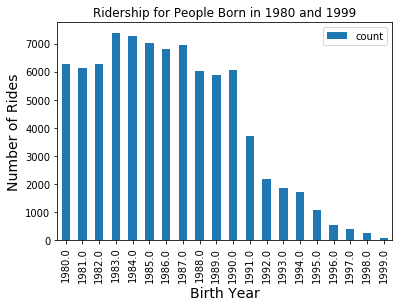

In [38]:
ax = new.plot.bar(x='birth_year', y='count', rot=1)
plt.xlabel('Birth Year', fontsize=14)
plt.xticks(rotation='vertical')
plt.ylabel('Number of Rides', fontsize=14)
plt.title('Ridership for People Born in 1980 and 1999')

** FINDING PROPORTIONS OF PEOPLE BORN FROM 1980-1989 AND 1990-1999 **

In [55]:
# total observations
total = len(feb) #count of all observations in Feb 2015
total

196930

In [56]:
rate80s=len(df_80s)/total 
rate90s=len(df_90s)/total

print(rate80s)
print(rate90s)

0.3355456253491088
0.09014370588533997


** PERFORMING CHI SQUARED TEST BETWEEN TWO PROPORTIONS **

In [62]:
sample_values = np.array([[.3355 * 196930], [.0901 * 196930]])

print (evalChisq(sample_values))

0.0


**RESULT**

With an alpha of .05 and df=1, my result of 0 is less than 3.84 (from the chi squared table). Therefore, we cannot reject the null hypothesis that CitiBike users born in the 1980s are just as likely or more likely to use the service than those born in the 1990s.